# 01. Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# project folder path
path = r'/Users/achestnut/Desktop/Instacart Data Analysis'

In [3]:
# import cust_ords_prods_merge
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merge.pkl'))

# 02. Create bar chart, histogram, scatterplot, and line chart

In [4]:
df_combined.head()

order_id user_id eval_set  order_number  orders_day_of_week  hour_of_order  \
0   2539329       1    prior             1                   2              8   
1   2398795       1    prior             2                   3              7   
2    473747       1    prior             3                   3             12   
3   2254736       1    prior             4                   4              7   
4    431534       1    prior             5                   4             15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                     0.0         196                  1          0  ...   
1                    15.0         196                  1          1  ...   
2                    21.0         196                  1          1  ...   
3                    29.0         196                  1          1  ...   
4                    28.0         196                  1          1  ...   

     frequency_flag  first_name  last_name  gender    state age date_joined  \
0  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   
1  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   
2  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   
3  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   
4  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   

  number_of_dependants marital_status  income  
0                    3        married   40423  
1                    3        married   40423  
2                    3        married   40423  
3                    3        married   40423  
4                    3        married   40423  

[5 rows x 34 columns]

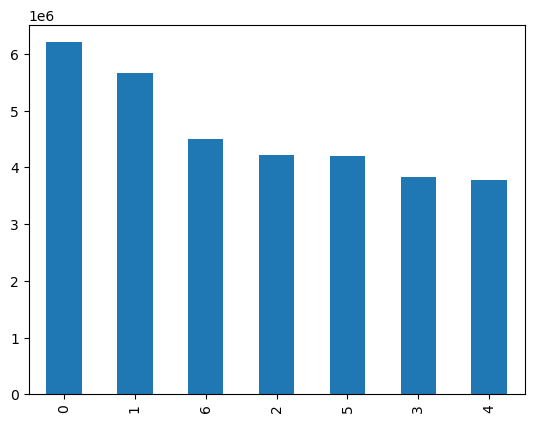

In [5]:
# bar chart for orders_day_of_week
bar = df_combined['orders_day_of_week'].value_counts().plot.bar()

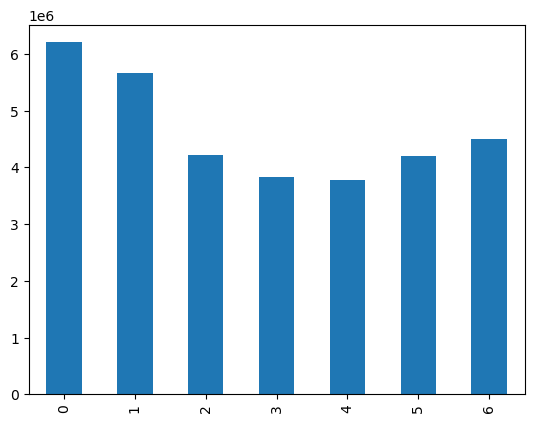

In [6]:
# sort bar chart to be in numerical order
bar = df_combined['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_combined_dow.png'))

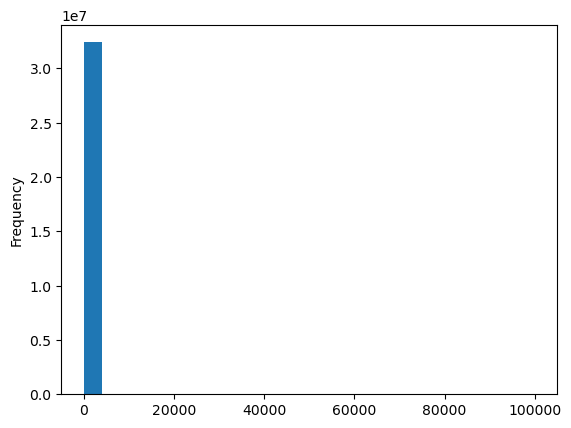

In [9]:
# create histogram 'prices' column
hist = df_combined['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

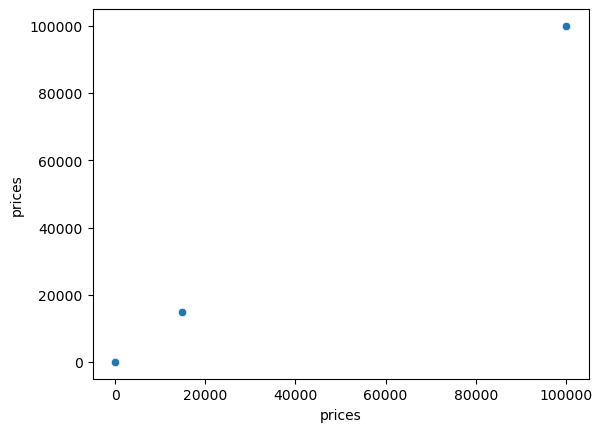

In [10]:
# scatterplot of 'prices' column
sns.scatterplot(x = 'prices', y = 'prices', data = df_combined)

In [11]:
# anything above the 'normal' price of a supermarket item
df_combined.loc[df_combined['prices'] > 100]

order_id user_id eval_set  order_number  orders_day_of_week  \
7805       1435153    1519    prior            26                   2   
7806       1066435    1519    prior            32                   3   
15143      1697208    2409    prior            33                   1   
20264       965345    3531    prior            27                   2   
20497      2943740    3793    prior             1                   2   
...            ...     ...      ...           ...                 ...   
32303799   3265389   51346    prior             4                   1   
32307882   1179092  131671    prior            12                   4   
32310810   1226705   39667    prior             7                   2   
32330048   3000037   95105    prior             2                   4   
32330049   2741225   95105    prior             4                   5   

          hour_of_order  days_since_prior_order  product_id  \
7805                 11                     6.0       21553   
7806                 10                     5.0       21553   
15143                19                     5.0       21553   
20264                19                     8.0       33664   
20497                 9                     0.0       21553   
...                 ...                     ...         ...   
32303799             17                    13.0       33664   
32307882              9                    15.0       33664   
32310810             15                    20.0       33664   
32330048             19                    22.0       33664   
32330049             12                     2.0       33664   

          add_to_cart_order  reordered  ...         frequency_flag  \
7805                     15          0  ...      Frequent customer   
7806                     28          1  ...      Frequent customer   
15143                     1          0  ...      Frequent customer   
20264                     2          0  ...      Frequent customer   
20497                     3          0  ...      Frequent customer   
...                     ...        ...  ...                    ...   
32303799                  2          1  ...       Regular customer   
32307882                  1          0  ...       Regular customer   
32310810                 14          0  ...  Non-frequent customer   
32330048                  4          0  ...      Frequent customer   
32330049                  3          1  ...      Frequent customer   

          first_name  last_name  gender           state age date_joined  \
7805           Craig      Clark    Male    Rhode Island  68    3/4/2020   
7806           Craig      Clark    Male    Rhode Island  68    3/4/2020   
15143         Nicole   Odonnell  Female          Hawaii  55  11/11/2018   
20264          Alice    Compton  Female          Hawaii  80   10/6/2019   
20497          Jerry      Allen    Male       Louisiana  59   8/23/2019   
...              ...        ...     ...             ...  ..         ...   
32303799         nan      Gould    Male    Rhode Island  58   1/25/2019   
32307882       Diana     Hansen  Female    Rhode Island  35    8/4/2018   
32310810      Johnny      Colon    Male    Rhode Island  78    5/8/2019   
32330048   Catherine   Browning  Female  South Carolina  48   1/18/2017   
32330049   Catherine   Browning  Female  South Carolina  48   1/18/2017   

         number_of_dependants    marital_status  income  
7805                        0  divorced/widowed  177864  
7806                        0  divorced/widowed  177864  
15143                       2           married  230074  
20264                       2           married  233776  
20497                       3           married  182933  
...                       ...               ...     ...  
32303799                    1           married  207497  
32307882                    0            single   86490  
32310810                    2           married  195077  
32330048                    2           married  39888

In [12]:
# turn outliers in NaNs
df_combined.loc[df_combined['prices'] > 100, 'prices'] = np.nan

In [13]:
# max value check on 'prices'
df_combined['prices'].max()

25.0

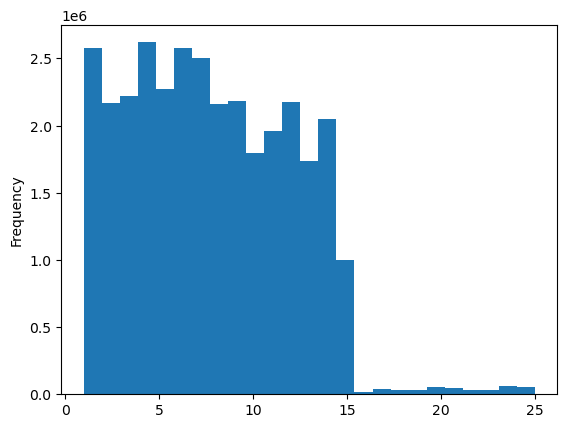

In [14]:
# second try histogram for 'prices'
hist = df_combined['prices'].plot.hist(bins = 25)

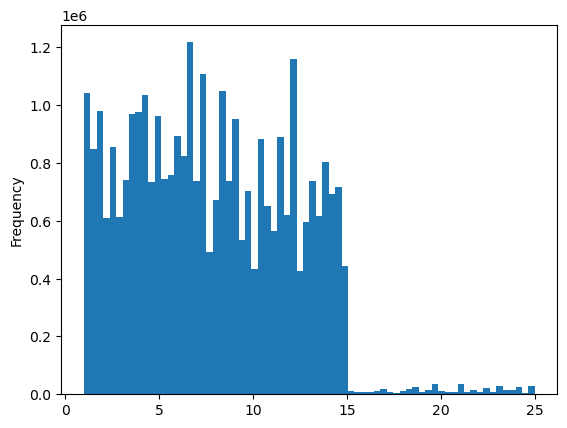

In [15]:
# same histogram with increased level of granularity
hist_2 = df_combined['prices'].plot.hist(bins = 70)

In [16]:
# export histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_combined_prices.png'))

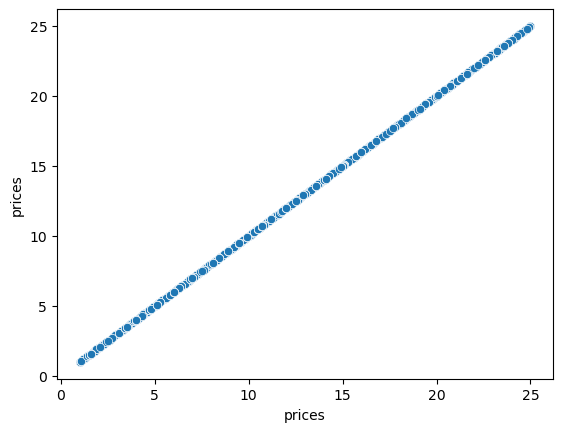

In [17]:
# second scatterplot
scatterplot = sns.scatterplot(x = 'prices', y = 'prices', data = df_combined)

In [18]:
# export scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatplt_combined_prices.png'))

In [19]:
# create a list holding true/false values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_combined)) <= 0.7

In [20]:
# store 70% of the sample in the dataframe big
big = df_combined[dev]

In [21]:
# store 30% of the sample in the dataframe small
small = df_combined[~dev]

In [22]:
# check number of rows original dataframe
len(df_combined)

32404859

In [23]:
# check number of rows of big and small dataframe
len(big) + len(small)

32404859

In [24]:
# reducing your samples to only those columns necessary for the chart
df_combined2 = small[['orders_day_of_week', 'prices']]

In [25]:
# create line chart
line = sns.lineplot(data = df_combined2, x = 'orders_day_of_week', y = 'prices')

In [27]:
# export line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_combined_ords_prices.png'))

 # 03. Descriptive findings about sales

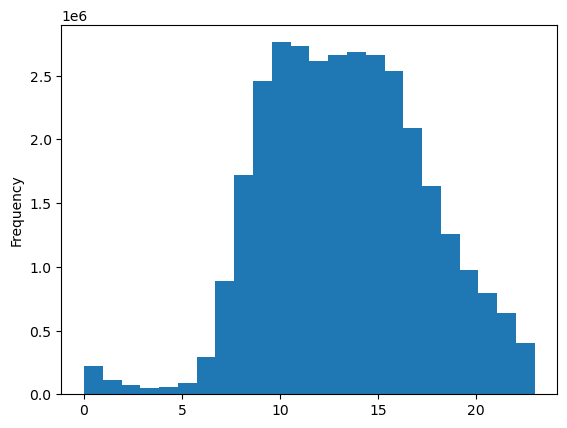

In [31]:
# histogram for 'hour_of_order'
hist_hour = df_combined['hour_of_order'].plot.hist(bins = 24)

The histogram demonstrates that the highest frequency of orders occurs from 10-17, which stands for 10am to 5pm. 

In [32]:
# export histogram
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_order.png'))

# 04. Distribution of orders

In [33]:
# create max order column
df_combined['max_order'] = df_combined.groupby(['user_id'])['order_number'].transform(np.max)

In [34]:
df_combined.head()

order_id user_id eval_set  order_number  orders_day_of_week  hour_of_order  \
0   2539329       1    prior             1                   2              8   
1   2398795       1    prior             2                   3              7   
2    473747       1    prior             3                   3             12   
3   2254736       1    prior             4                   4              7   
4    431534       1    prior             5                   4             15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                     0.0         196                  1          0  ...   
1                    15.0         196                  1          1  ...   
2                    21.0         196                  1          1  ...   
3                    29.0         196                  1          1  ...   
4                    28.0         196                  1          1  ...   

     frequency_flag  first_name  last_name  gender    state age date_joined  \
0  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   
1  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   
2  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   
3  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   
4  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   

  number_of_dependants marital_status  income  
0                    3        married   40423  
1                    3        married   40423  
2                    3        married   40423  
3                    3        married   40423  
4                    3        married   40423  

[5 rows x 34 columns]

In [35]:
# create loyal customer flag
df_combined.loc[df_combined['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [36]:
df_combined.loc[(df_combined['max_order'] <= 40) & (df_combined['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [37]:
df_combined.loc[df_combined['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [38]:
# frequency of loyalty flag
df_combined['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

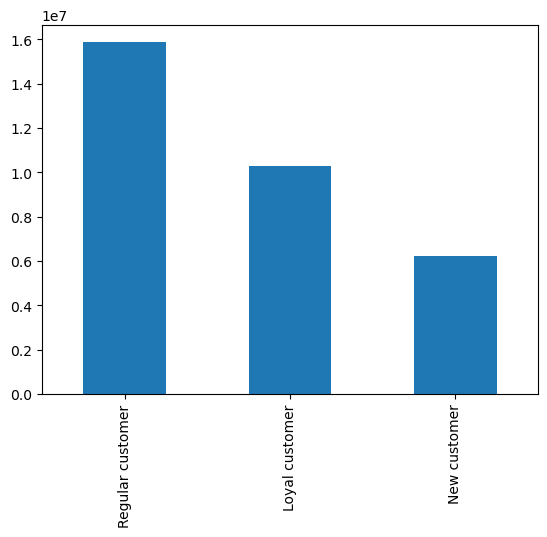

In [39]:
# bar chart for loyalty flag
loyal_bar = df_combined['loyalty_flag'].value_counts().plot.bar()

In [41]:
# export bar chart
loyal_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

# 05. Difference in expenditure

In [42]:
# reducing your samples to only those columns necessary for the chart
df_combined3 = small[['prices', 'hour_of_order']]

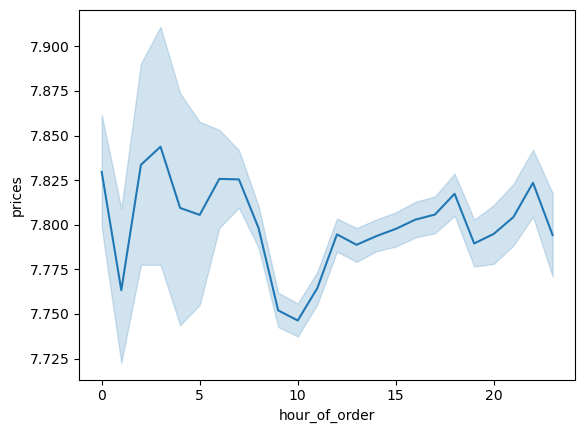

In [43]:
# create line chart
line_hour = sns.lineplot(data = df_combined3, x = 'hour_of_order', y = 'prices')

In [44]:
# export line chart
line_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_expenditures_hour.png'))

# 06. Exploratory analysis of demographics

In [45]:
# reducing your samples to only those columns necessary for the chart
df_combined4 = small[['age', 'number_of_dependants']]

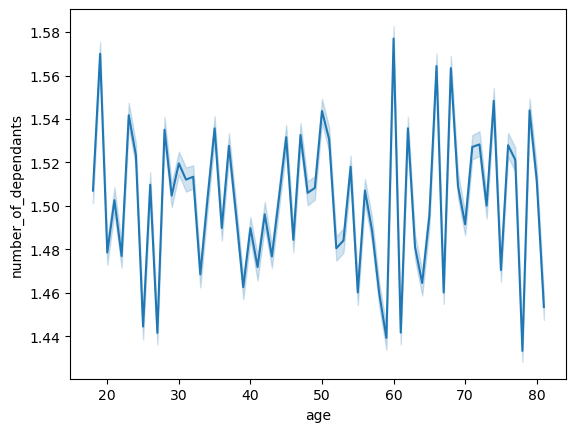

In [46]:
# create line chart
line_age = sns.lineplot(data = df_combined4, x = 'age', y = 'number_of_dependants')

Looking at the line chart above, you can tell there is no real connection between age and family situation. This shows you can have any number of dependants at any age. 

In [47]:
# export line chart
line_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

# 07. Age and spending connection

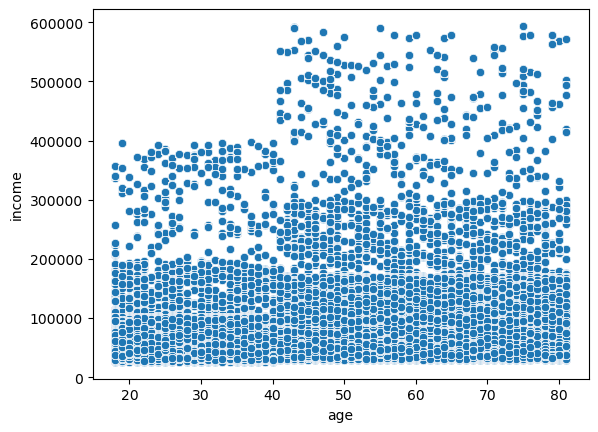

In [48]:
# scatterplot connection between age and income
sctplt_age_income = sns.scatterplot(data = df_combined, x = 'age', y = 'income')

Per the scatterplot, majority of individuals have an income of 200k or less. It looks like the connection of age to income shows that as you reach the age of 40 and above more individual's income passes the 200k amount. 

In [49]:
# export scatterplot
sctplt_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sctplt_age_income.png'))